In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dEscaleDown', 'dEscaleUp', 'dEsigmaDown', 'dEsigmaUp', 'deltaEtaSC', 'dr03EcalRecHitSumEt', 'dr03HcalDepth1TowerSumEt', 'dr03TkSumPt', 'dr03TkSumPtHEEP', 'dxy', 'dxyErr', 'dz', 'dzErr', 'eCorr', 'eInvMinusPInv', 'energyErr', 'eta', 'hoe', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'mvaFall17V2Iso', 'mvaFall17V2noIso', 'pfRelIso03_all', 'pfRelIso03_chg', 'phi', 'pt', 'r9', 'scEtOverPt', 'sieie', 'sip3d', 'mvaTTH', 'charge', 'cutBased', 'jetIdx', 'pdgId', 'photonIdx', 'tightCharge', 'vidNestedWPBitmap', 'vidNestedWPBitmapHEEP', 'convVeto', 'cutBased_HEEP', 'isPFcand', 'jetNDauCharged', 'lostHits', 'mvaFall17V2Iso_WP80', 'mvaFall17V2Iso_WP90', 'mvaFall17V2Iso_WPL', 'mvaFall17V2noIso_WP80', 'mvaFall17V2noIso_WP90', 'mvaFall17V2noIso_WPL', 'seedGain', 'genPartIdx', 'genPartFlav', 'cleanmask', 'genPartIdxG', 'jetIdxG', 'photonIdxG']


# Displacement
## dxy, BS, PV related variables

## dxy

4mu dxy structure: [[], [], [], [], [], [], [], [], ... 0.00798], [], [], [], [], [], [], [-0.00792]]
2mu2e dxy structure: [[-0.00286, -0.00192], [-0.000153, -0.0104], ... 0.00159], [-0.00103], [0.00328]]
4mu dxy structure: [[-0.012], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e dxy structure: [[-0.0222, 0.0368], [-0.00016, -0.00187], ... [-0.0114], [-0.0169, 0.0645, -0.014]]
4mu dxy structure: [[], [], [], [], [], [], [], [-0.00107], ... [], [], [], [], [], [], [], [-0.000979]]
2mu2e dxy structure: [[], [0.179], [0.0155], [], [-0.00429, ... 0.032], [], [0.00656], [], [-0.00285]]
4mu dxy structure: [[], [], [], [], [], [], [], [], [], ... [0.000133], [], [], [], [], [], [], []]
2mu2e dxy structure: [[-0.00287], [], [-0.0995], [], [], [], ... 0.00963], [], [], [0.0366], [], [0.0724]]
4mu dxy structure: [[], [], [], [0.0494], [], [], [], [], ... [], [], [-0.0107], [], [], [], [], []]
2mu2e dxy structure: [[], [], [], [], [], [], [], [0.00832], ... [], [-0

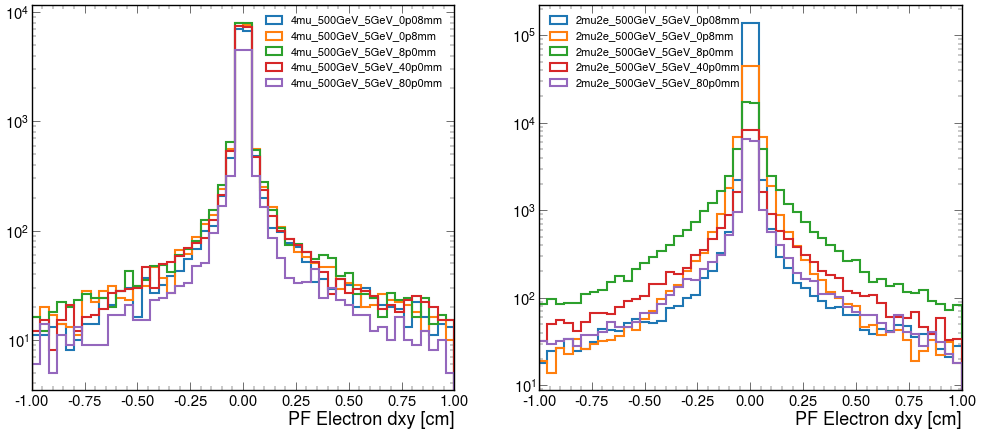

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy", events_4mu[i_4mu].dxy, events_2mu2e[i_2mu].dxy)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Electron dxy [cm]')
ax[1].set_xlabel('PF Electron dxy [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Displacement/dxy.png", bbox_inches="tight")

## dxyErr

4mu dxyErr structure: [[], [], [], [], [], [], [], [], [], ... 0.00299], [], [], [], [], [], [], [0.00928]]
2mu2e dxyErr structure: [[0.00185, 0.00198], [0.00169, 0.0018], ... 0.00192], [0.00168], [0.00166]]
4mu dxyErr structure: [[0.0047], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e dxyErr structure: [[0.00226, 0.00537], [0.00171, 0.00345], ... [0.00157], [0.00172, 0.00226, 0.00194]]
4mu dxyErr structure: [[], [], [], [], [], [], [], [0.00247], ... [], [], [], [], [], [], [], [0.00433]]
2mu2e dxyErr structure: [[], [0.01], [0.00342], [], [0.00166, ... 0.00211], [], [0.00388], [], [0.00641]]
4mu dxyErr structure: [[], [], [], [], [], [], [], [], [], ... [0.00562], [], [], [], [], [], [], []]
2mu2e dxyErr structure: [[0.00494], [], [0.103], [], [], [], ... 0.0094], [], [], [0.00726], [], [0.0094]]
4mu dxyErr structure: [[], [], [], [0.0396], [], [], [], [], ... [], [], [0.00354], [], [], [], [], []]
2mu2e dxyErr structure: [[], [], [], [], [], [], [], [

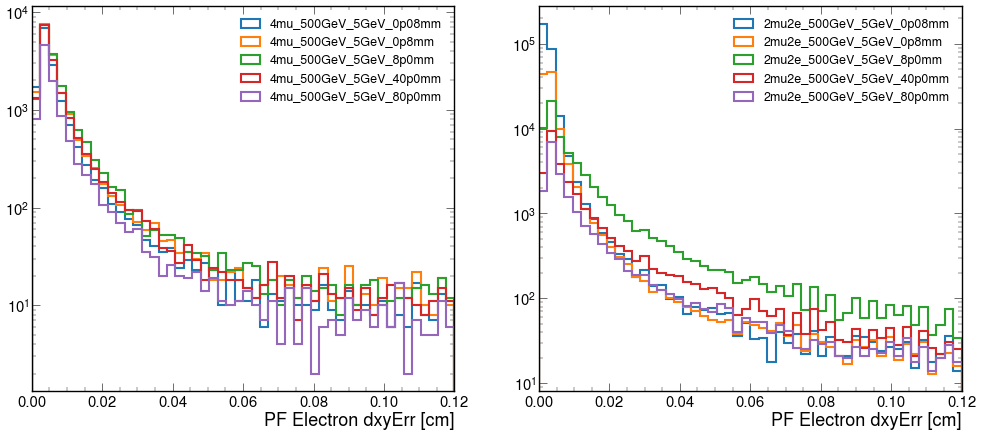

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyErr", events_4mu[i_4mu].dxyErr, events_2mu2e[i_2mu].dxyErr)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyErr), range=(0,0.12), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyErr), range=(0,0.12), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,0.12)
ax[1].set_xlim(0,0.12)
ax[0].set_xlabel('PF Electron dxyErr [cm]')
ax[1].set_xlabel('PF Electron dxyErr [cm]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Displacement/dxyErr.png", bbox_inches="tight")

## dz

4mu dz structure: [[], [], [], [], [], [], [], [], [], ... [0.00325], [], [], [], [], [], [], [-3.38]]
2mu2e dz structure: [[0.00172, -0.00238], [-0.00825, 0.0512], ... 0.00292], [0.000573], [-0.00283]]
4mu dz structure: [[-6.5], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e dz structure: [[-0.0584, 0.109], [0.00614, -0.0174], ... [-0.00155], [0.0107, -0.0162, 0.00193]]
4mu dz structure: [[], [], [], [], [], [], [], [-0.00426], ... [], [], [], [], [], [], [], [0.003]]
2mu2e dz structure: [[], [0.574], [6.27], [], [-0.00243, ... -0.0723], [], [0.00123], [], [-0.0166]]
4mu dz structure: [[], [], [], [], [], [], [], [], [], [], ... [], [3.21], [], [], [], [], [], [], []]
2mu2e dz structure: [[-3.19], [], [-1.7], [], [], [], ... [-0.00639], [], [], [-0.0887], [], [-0.404]]
4mu dz structure: [[], [], [], [4.82], [], [], [], [], ... [], [], [-0.00137], [], [], [], [], []]
2mu2e dz structure: [[], [], [], [], [], [], [], [0.885], ... [], [-0.25], [], [-1.17], [

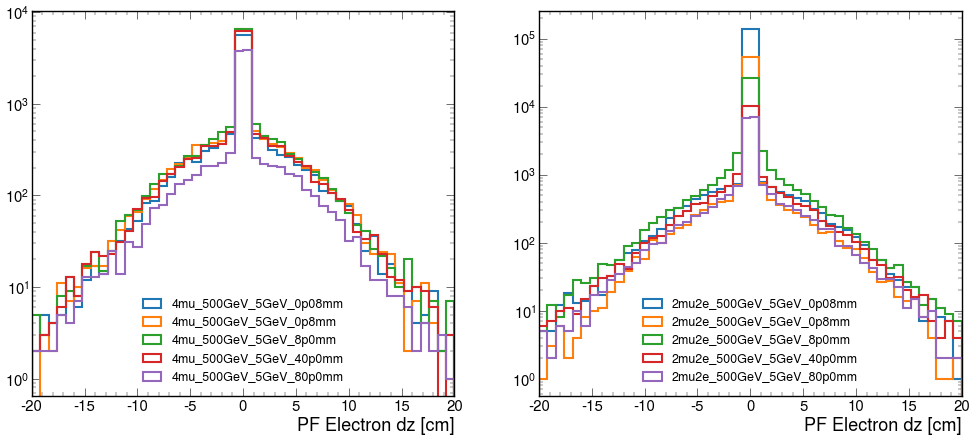

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz", events_4mu[i_4mu].dz, events_2mu2e[i_2mu].dz)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-20,20)
ax[1].set_xlim(-20,20)
ax[0].set_xlabel('PF Electron dz [cm]')
ax[1].set_xlabel('PF Electron dz [cm]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Displacement/dz.png", bbox_inches="tight")

## dzErr

4mu dzErr structure: [[], [], [], [], [], [], [], [], [], ... [0.00262], [], [], [], [], [], [], [0.0229]]
2mu2e dzErr structure: [[0.00198, 0.00229], [0.00345, 0.00476], ... 0.00253], [0.00186], [0.00281]]
4mu dzErr structure: [[0.0117], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e dzErr structure: [[0.0036, 0.00476], [0.00336, 0.00421], ... [0.00269], [0.00308, 0.00354, 0.0032]]
4mu dzErr structure: [[], [], [], [], [], [], [], [0.00415], ... [], [], [], [], [], [], [], [0.00555]]
2mu2e dzErr structure: [[], [0.00604], [0.00574], [], [0.00259, ... 0.00262], [], [0.00488], [], [0.00616]]
4mu dzErr structure: [[], [], [], [], [], [], [], [], [], ... [0.00574], [], [], [], [], [], [], []]
2mu2e dzErr structure: [[0.0156], [], [0.084], [], [], [], ... [0.0205], [], [], [0.00629], [], [0.0125]]
4mu dzErr structure: [[], [], [], [0.121], [], [], [], [], ... [], [], [0.00409], [], [], [], [], []]
2mu2e dzErr structure: [[], [], [], [], [], [], [], [0.0135], 

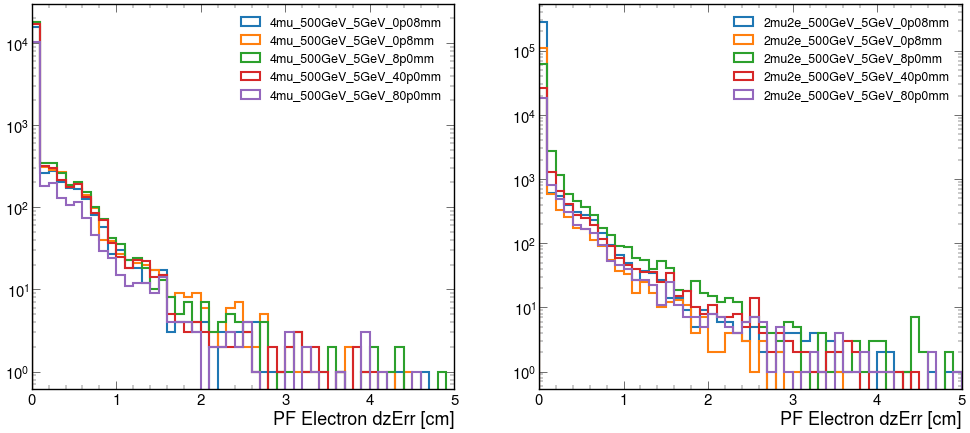

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzErr", events_4mu[i_4mu].dzErr, events_2mu2e[i_2mu].dzErr)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzErr), range=(0,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzErr), range=(0,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,5)
ax[1].set_xlim(0,5)
ax[0].set_xlabel('PF Electron dzErr [cm]')
ax[1].set_xlabel('PF Electron dzErr [cm]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Displacement/dzErr.png", bbox_inches="tight")